## Loan Status Prediction
Dataset source: https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction <br>
Descriptions:
- In this Loan Status Prediction dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
- The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…
- Our goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

Field descriptions:
- Loan_ID: A unique loan ID.
- Gender: Either male or female.
- Married: Weather Married(yes) or Not Marttied(No).
- Dependents: Number of persons depending on the client.
- Education: Applicant Education(Graduate or Undergraduate).
- Self_Employed: Self-employed (Yes/No).
- ApplicantIncome: Applicant income.
- CoapplicantIncome: Co-applicant income.
- LoanAmount: Loan amount in thousands.
- Loan_Amount_Term: Terms of the loan in months.
- Credit_History: Credit history meets guidelines.
- Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
- Loan_Status: Loan approved (Y/N).

<hr>

### Import Libraries

In [1]:
# Base
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Pre-processing
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

#### Load Data

In [2]:
loan_data = pd.read_csv('loan_data.csv', engine='pyarrow')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


Drop Column Loan_ID since it has no importance on the data

In [3]:
# Drop Loan_ID
loan_data = loan_data.drop(columns='Loan_ID')
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Check Missing Values

In [4]:
loan_data.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Drop missing values

In [5]:
loan_data.dropna(inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             308 non-null    object 
 1   Married            308 non-null    object 
 2   Dependents         308 non-null    object 
 3   Education          308 non-null    object 
 4   Self_Employed      308 non-null    object 
 5   ApplicantIncome    308 non-null    int64  
 6   CoapplicantIncome  308 non-null    float64
 7   LoanAmount         308 non-null    float64
 8   Loan_Amount_Term   308 non-null    float64
 9   Credit_History     308 non-null    float64
 10  Property_Area      308 non-null    object 
 11  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 31.3+ KB


All columns are already in the right format, no converting data type needed.

#### EDA
Visualize the categorical data and numerical data to gain insights

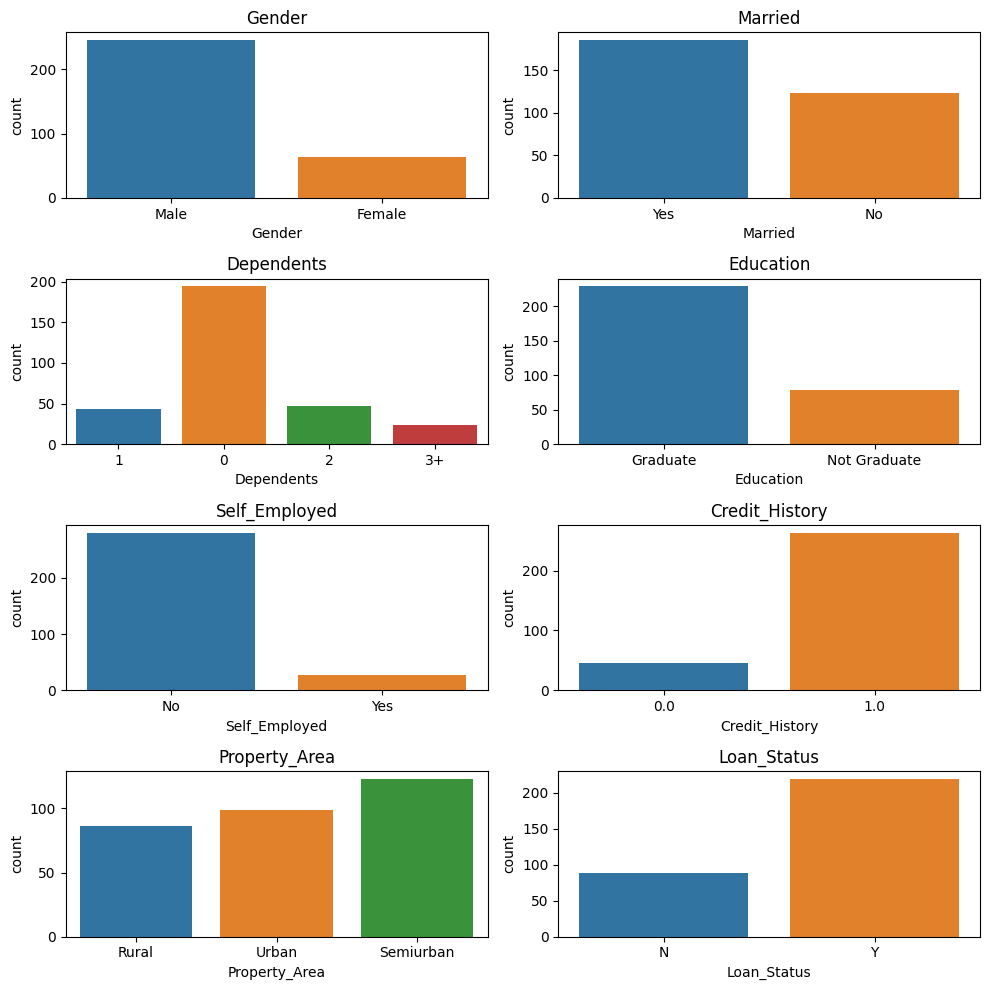

In [6]:
# Visualize Categorical data
cat_cols = loan_data[:11]
cat_cols = cat_cols.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'])
cat_cols = cat_cols.columns

# Set up the subplot with 12 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through columns and plot each countplot
for i, column in enumerate(cat_cols):
    sns.countplot(x=column, data=loan_data, ax=axes[i])
    axes[i].set_title(f'{column}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

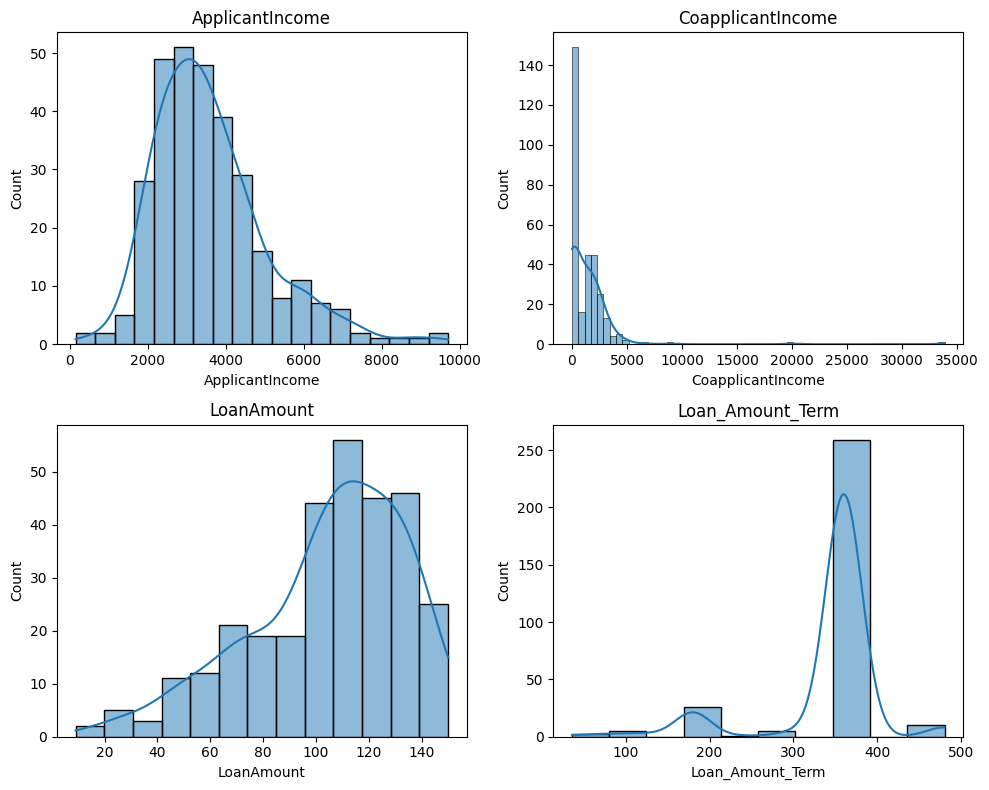

In [7]:
# Visualize Numerical data
cols_num = loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']]
cols_num = cols_num.columns

# Set up the subplot with 12 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through columns and plot each countplot
for i, column in enumerate(cols_num):
    sns.histplot(x=column, data=loan_data, ax=axes[i], kde=True)
    axes[i].set_title(f'{column}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

EDA Summary:
1. In general, more male apply for loans compared to female.
2. Most of the applicants are already married.
3. Most of the applicants have 0 dependents.
4. Most of the applicants are already graduated.
5. Most of the applicants are not self employed.
6. Most of the applicant's credit history meets guidelines.
7. Most of the applicants lived in Semiurban Area
8. Most of the applicants income are in range 2000 - 4000 USD.
9. Most of the Coapplicants income are under 5000 USD.
10. Loan Amount that applicant request are in range 100.000 - 120.000 USD.
11. Most of the applicants propose a 300<'x'<=400 loan term.

Based on the EDA Summary, we need to:
1. Perform oversampling, since the target class (Loan_Status) is imbalanced.
2. Encoding categorical values
3. Normalize the data set using MinMaxScaler.
<hr>

#### Pre-processing
Random Oversampling

In [8]:
# Check the values of the Loan_Status variable
loan_data[['Loan_Status']].value_counts()

Loan_Status
Y              219
N               89
Name: count, dtype: int64

In [9]:
# Initialize the class to perform oversampling, in this case is 'N' class
class_cnt = [300, 219, 89]
minor_class = ['N', 'Y']
class_mapping = {'N': 0, 'Y': 1}

# Mapping
loan_data['ClassEncoded'] = loan_data['Loan_Status'].map(class_mapping)

In [10]:
# Set oversampling strategy
sampling_strategy = {
    0: class_cnt[0],  # Oversampling for N
    1: class_cnt[0],  # oversampling for Y
}

# Initialize RandomOverSampler with the defined strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Extract features and labels
X = loan_data.drop(['Loan_Status', 'ClassEncoded'], axis=1)
y = loan_data['ClassEncoded']

# Fit transform data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Merge data
resampled_loan = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='ClassEncoded')], axis=1)

# Mapping  encoding result
resampled_loan['Loan_Status'] = resampled_loan['ClassEncoded'].map({v: k for k, v in class_mapping.items()})

# Drop temporary 'ClassEncoded' column
resampled_loan = resampled_loan.drop('ClassEncoded', axis=1)

# See the result
print(resampled_loan['Loan_Status'].value_counts())

Loan_Status
N    300
Y    300
Name: count, dtype: int64


In [11]:
# Take a peek of the data
resampled_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    object 
 1   Married            600 non-null    object 
 2   Dependents         600 non-null    object 
 3   Education          600 non-null    object 
 4   Self_Employed      600 non-null    object 
 5   ApplicantIncome    600 non-null    int64  
 6   CoapplicantIncome  600 non-null    float64
 7   LoanAmount         600 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     600 non-null    float64
 10  Property_Area      600 non-null    object 
 11  Loan_Status        600 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.4+ KB


In [12]:
resampled_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Encoding

In [13]:
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']

resampled_loans = resampled_loan.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in cat_cols:
    resampled_loans[col] = le.fit_transform(resampled_loans[col])

resampled_loans

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0,0,0,0,4000,2500.0,140.0,360.0,1.0,0,1
596,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0,1
597,0,1,1,0,0,4666,0.0,135.0,360.0,1.0,2,1
598,1,1,1,1,0,2239,2524.0,128.0,360.0,1.0,2,1


Feature Selection with Correlation Matrix

<Axes: >

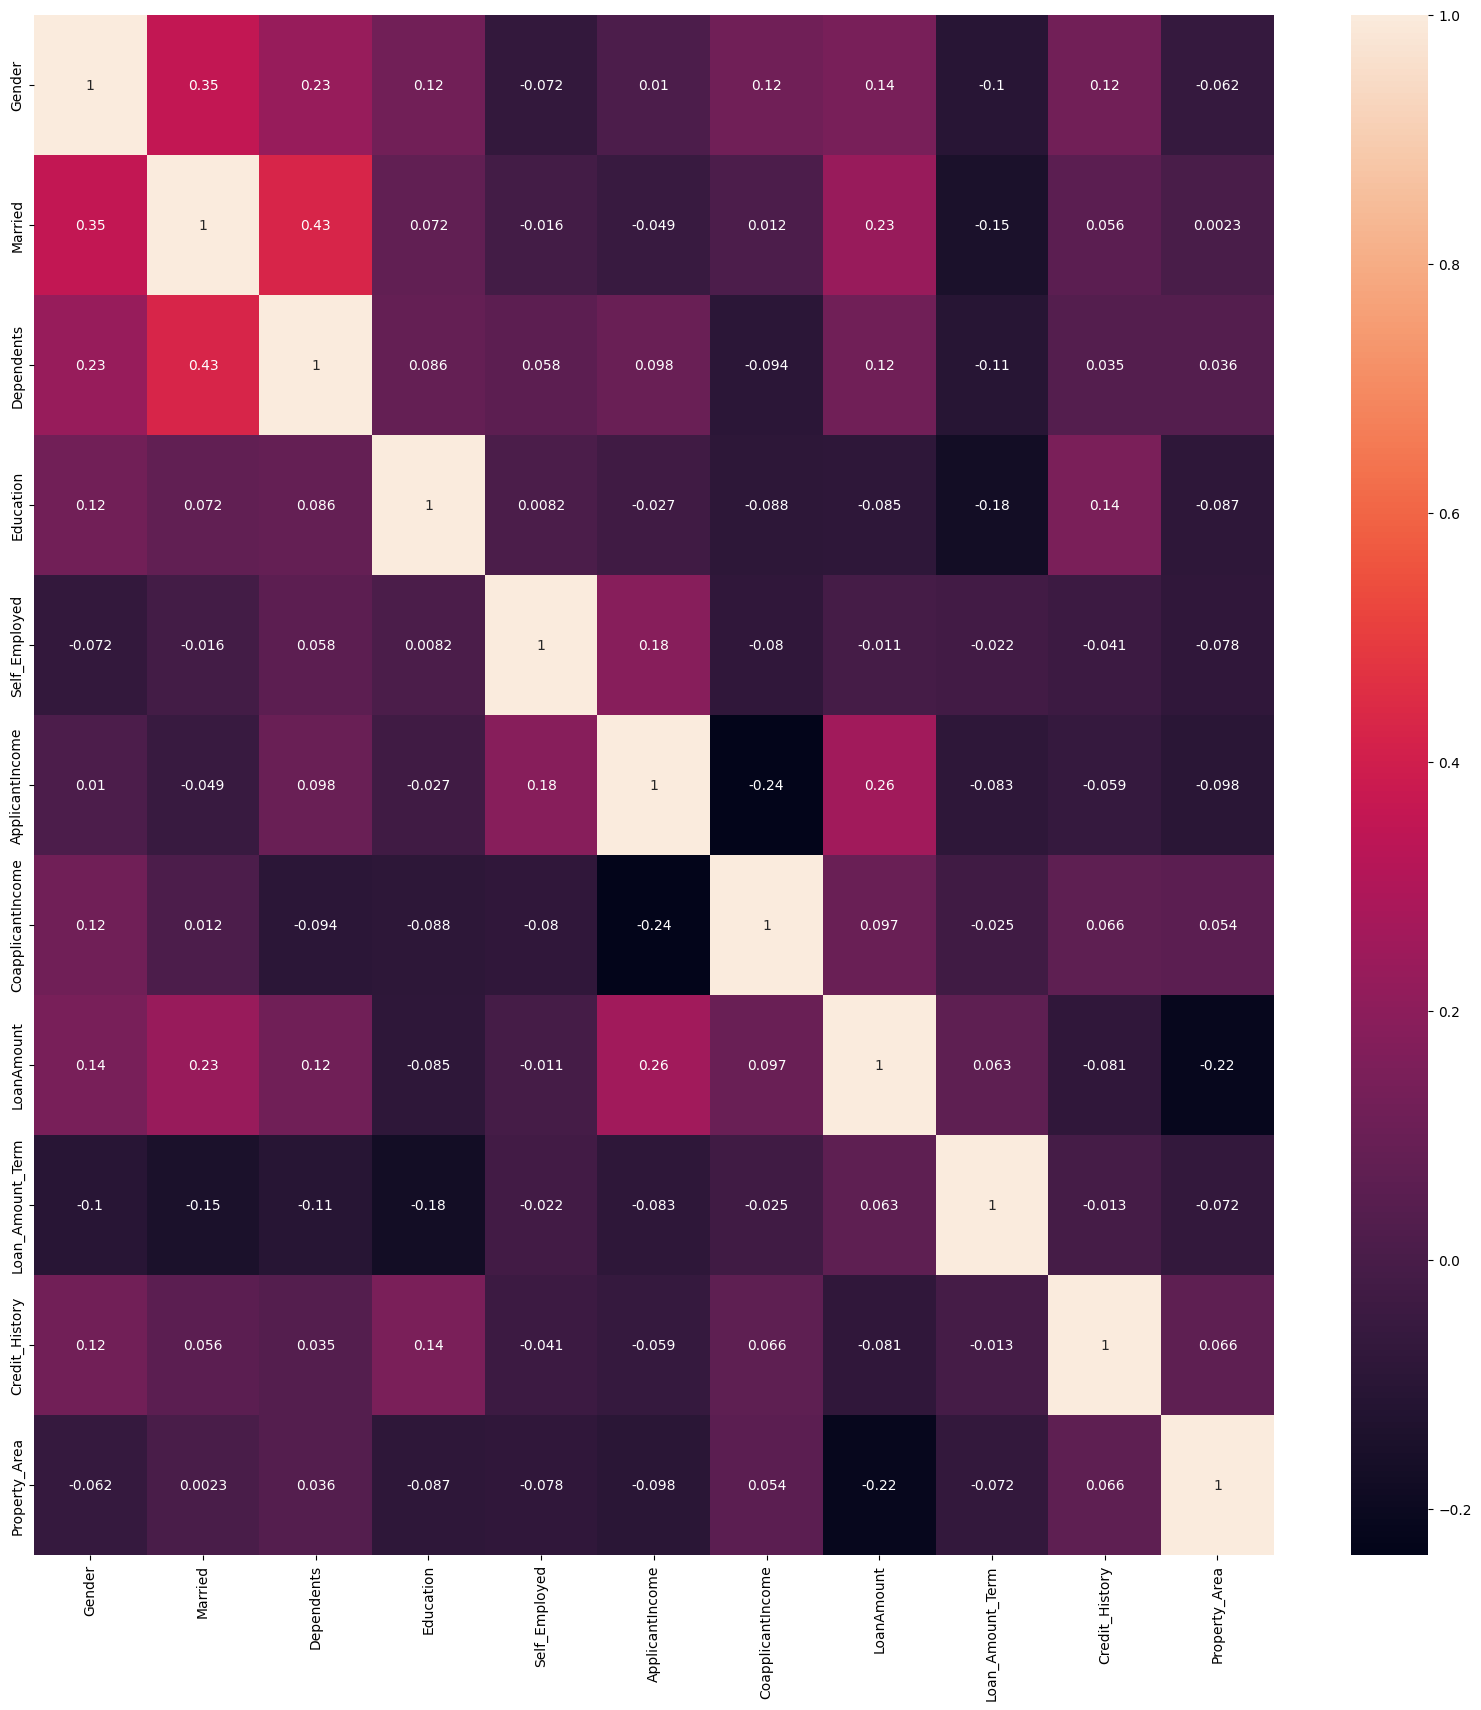

In [14]:
# Correlation Matrix
corrs = resampled_loans.copy()
corrs = corrs.drop(columns='Loan_Status')
corel = corrs.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corel, annot=True)

Selected features:
['Gender', 'Married', 'Dependents', 'LoanAmount', 'ApplicantIncome', 'Property_Area', 'CoapplicantIncome', 'Loan_Amount_Term']

Normalize

In [15]:
X = resampled_loans[['Gender', 'Married', 'Dependents', 'LoanAmount', 'ApplicantIncome', 'Property_Area', 'CoapplicantIncome', 'Loan_Amount_Term']]
y = resampled_loans[['Loan_Status']]

mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

Data SPlitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Modeling
Decision Tree with Hyperparameter Tuning

In [17]:
# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Define the hyperparameter grid to search
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with cross-validation
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = dt_grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


Random Forest Classifier with Hyperparameter Tuning

In [18]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Define the hyperparameter grid to search
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = rf_grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


XGBoost Classifier with Hyperparameter Tuning

In [19]:
# Initialize XGBoost Classifier
xgb = XGBClassifier()

# Define the hyperparameter grid to search
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Perform Grid Search with cross-validation
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = xgb_grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}


#### Model Evaluation
Decision Tree

In [20]:
dt_y_pred = dt_grid_search.predict(X_test)

dt_report = classification_report(y_test, dt_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(dt_report)
print("Decision Tree Classification Accuracy: {}%".format(np.round(dt_accuracy, 2)*100))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        54
           1       0.97      0.89      0.93        66

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120

Decision Tree Classification Accuracy: 92.0%


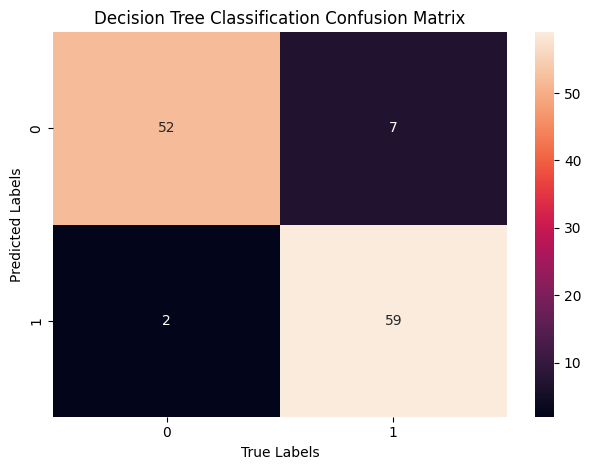

In [21]:
dt_cnf_matrix = confusion_matrix(dt_y_pred, y_test)
sns.heatmap(dt_cnf_matrix, annot=True)
plt.title("Decision Tree Classification Confusion Matrix")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.tight_layout()
plt.show()

Random Forest

In [22]:
rf_y_pred = rf_grid_search.predict(X_test)

rf_report = classification_report(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(rf_report)
print("Random Forest Classification Accuracy: {}%".format(np.round(rf_accuracy, 2)*100))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        54
           1       0.95      0.89      0.92        66

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

Random Forest Classification Accuracy: 92.0%


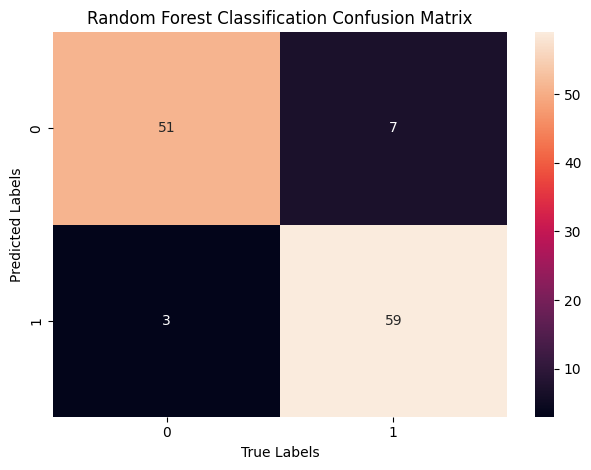

In [23]:
rf_cnf_matrix = confusion_matrix(rf_y_pred, y_test)
sns.heatmap(rf_cnf_matrix, annot=True)
plt.title("Random Forest Classification Confusion Matrix")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.tight_layout()
plt.show()

XGBoost

In [24]:
xgb_y_pred = xgb_grid_search.predict(X_test)

xgb_report = classification_report(y_test, xgb_y_pred)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(xgb_report)
print("XGBoost Classification Accuracy: {}%".format(np.round(xgb_accuracy, 2)*100))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.89      0.89      0.89        66

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120

XGBoost Classification Accuracy: 88.0%


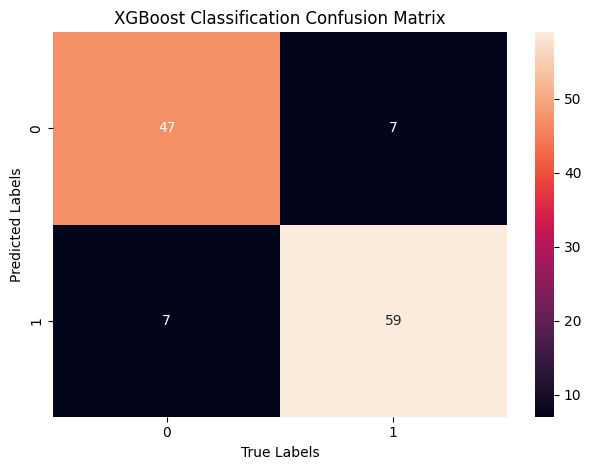

In [25]:
xgb_cnf_matrix = confusion_matrix(xgb_y_pred, y_test)
sns.heatmap(xgb_cnf_matrix, annot=True)
plt.title("XGBoost Classification Confusion Matrix")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.tight_layout()
plt.show()